# Sport Vouchers Program Analysis

The goal of this Portfolio task is to explore data from the Federal Government Sport Vouchers program - this is a
program that provides up to two $100 vouchers for kids to participate in organised sport. Here's the [NSW Active Kids page](https://www.service.nsw.gov.au/transaction/apply-active-kids-voucher), there are similar schemes in other states - this data is from South Australia.

This is an exercise in exploring data and communicating the insights you can gain from it.  The source data comes
from the `data.gov.au` website and provides details of all Sport Vouchers that have been redeemed since February  in SA 2015 as part of the Sport Voucher program:  [Sports Vouchers Data](https://data.gov.au/dataset/ds-sa-14daba50-04ff-46c6-8468-9fa593b9f100/details).  This download is provided for you as `sportsvouchersclaimed.csv`.

To augment this data you can also make use of [ABS SEIFA data by LGA](http://stat.data.abs.gov.au/Index.aspx?DataSetCode=ABS_SEIFA_LGA#) which shows a few measures of Socioeconomic Advantage and Disadvantage for every Local Government Area. This data is provided for you as `ABS_SEIFA_LGA.csv`. This could enable you to answer questions about whether the voucher program is used equally by parents in low, middle and high socioeconomic areas.   You might be interested in this if you were concerned that this kind of program might just benifit parents who are already advantaged (they might already be paying for sport so this program wouldn't be helping much).

Questions:
* Describe the distribution of vouchers by: LGA, Sport - which regions/sports stand out? 
* Are some sports more popular in different parts of the state?
* Are any electorates over/under represented in their use of vouchers?
* Is there a relationship between any of the SEIFA measures and voucher use in an LGA?

A challenge in this task is to display a useful summary of the data given that there are a large number of LGAs and sports involved.  Try to avoid long lists and large tables. Think about what plots and tables communicate the main points of your findings. 


In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

## Data Exploration - Sports Vouchers Data

In [2]:
# read the sports vouchers data
sa_vouchers = pd.read_csv("data/sportsvouchersclaimed.csv")
sa_vouchers.head()

,Participant_ID,Participant_Suburb,Club_Previous_Member,Participant_ATSI_Indicator,Participant_CALD_Indicator,Participant_Sex,Voucher_Value,Club_Name,Voucher_Sport,Participant_LGA,Participant_Electorate,Voucher_Completion_Date,Voucher_Claim_Year
0,1000002,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Male,50,Flagstaff Hill Football Club,Australian Rules,ONKAPARINGA,FISHER,26/6/15 1:19,2015
1,1000002,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Male,50,Flagstaff Hill Football Club,Australian Rules,ONKAPARINGA,FISHER,29/6/16 23:55,2016
2,1000004,ABERFOYLE PARK,Not Registered Previously,Not ATSI,Not CALD,Female,50,Hub Gymnastics Club,Gymnastics,ONKAPARINGA,FISHER,21/4/16 3:37,2016
3,1000004,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Female,50,Hub Gymnastics Club,Gymnastics,ONKAPARINGA,FISHER,30/3/17 0:47,2017
4,1000005,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Female,50,Blackwood Community Recreation Association,Gymnastics,ONKAPARINGA,FISHER,20/7/15 2:50,2015


#### Data Description of the Sports Vouchers Data:
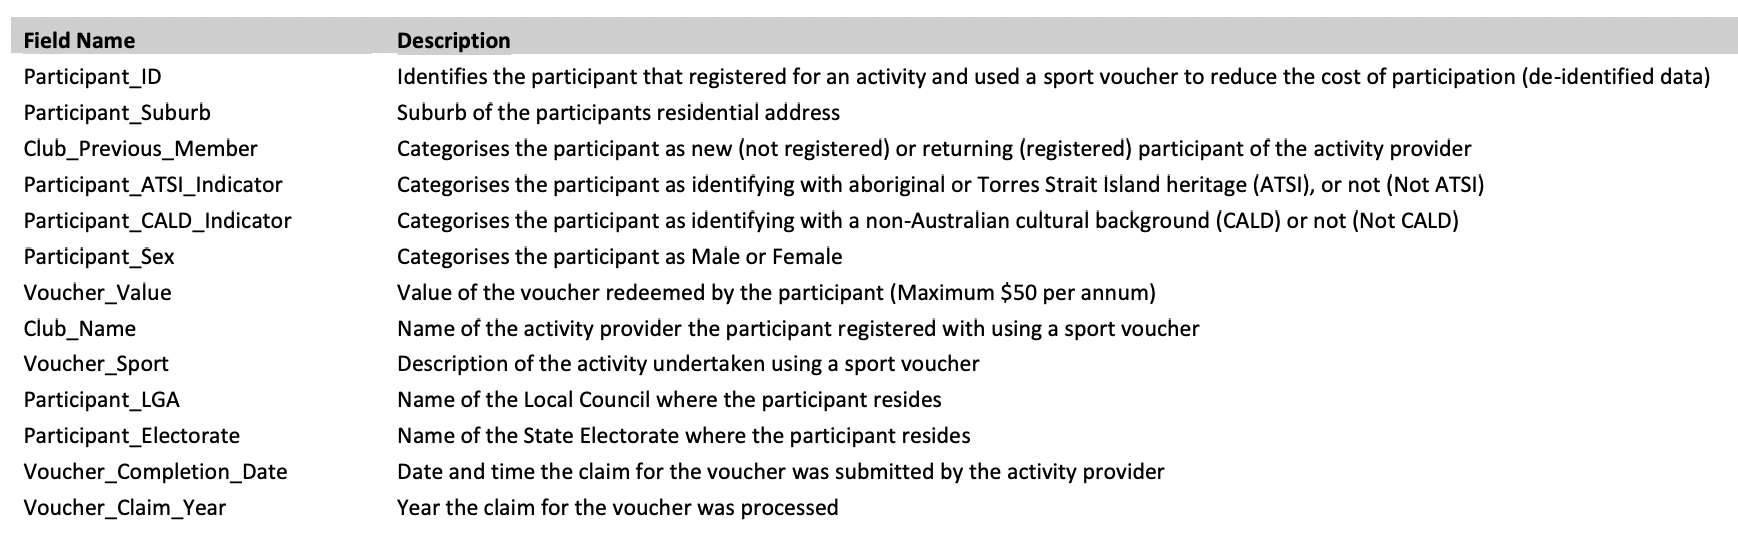

In [3]:
sa_vouchers.shape

(127526, 13)

In [4]:
print(sa_vouchers.columns)

Index(['Participant_ID', 'Participant_Suburb', 'Club_Previous_Member',
       'Participant_ATSI_Indicator', 'Participant_CALD_Indicator',
       'Participant_Sex', 'Voucher_Value', 'Club_Name', 'Voucher_Sport',
       'Participant_LGA', 'Participant_Electorate', 'Voucher_Completion_Date',
       'Voucher_Claim_Year'],
      dtype='object')


In [5]:
# check NA values
sa_vouchers.isna().sum()

Participant_ID                   0
Participant_Suburb               0
Club_Previous_Member             0
Participant_ATSI_Indicator       0
Participant_CALD_Indicator       0
Participant_Sex                  0
Voucher_Value                    0
Club_Name                        0
Voucher_Sport                    0
Participant_LGA                  0
Participant_Electorate           0
Voucher_Completion_Date       2080
Voucher_Claim_Year               0
dtype: int64

In [6]:
# drop NA values
sa_vouchers_clean = sa_vouchers.dropna()
sa_vouchers_clean.head()

,Participant_ID,Participant_Suburb,Club_Previous_Member,Participant_ATSI_Indicator,Participant_CALD_Indicator,Participant_Sex,Voucher_Value,Club_Name,Voucher_Sport,Participant_LGA,Participant_Electorate,Voucher_Completion_Date,Voucher_Claim_Year
0,1000002,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Male,50,Flagstaff Hill Football Club,Australian Rules,ONKAPARINGA,FISHER,26/6/15 1:19,2015
1,1000002,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Male,50,Flagstaff Hill Football Club,Australian Rules,ONKAPARINGA,FISHER,29/6/16 23:55,2016
2,1000004,ABERFOYLE PARK,Not Registered Previously,Not ATSI,Not CALD,Female,50,Hub Gymnastics Club,Gymnastics,ONKAPARINGA,FISHER,21/4/16 3:37,2016
3,1000004,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Female,50,Hub Gymnastics Club,Gymnastics,ONKAPARINGA,FISHER,30/3/17 0:47,2017
4,1000005,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Female,50,Blackwood Community Recreation Association,Gymnastics,ONKAPARINGA,FISHER,20/7/15 2:50,2015


In [7]:
sa_vouchers_clean.shape

(125446, 13)

In [8]:
sa_vouchers_clean.describe(include="all")

,Participant_ID,Participant_Suburb,Club_Previous_Member,Participant_ATSI_Indicator,Participant_CALD_Indicator,Participant_Sex,Voucher_Value,Club_Name,Voucher_Sport,Participant_LGA,Participant_Electorate,Voucher_Completion_Date,Voucher_Claim_Year
count,1.254460e+05,125446,125446,125446,125446,125446,125446.000000,125446,125446,125446,125446,125446,125446.000000
unique,NaN,1215,2,2,2,2,NaN,1154,50,69,48,273,NaN
top,NaN,MOUNT GAMBIER,Registered Previously,Not ATSI,Not CALD,Male,NaN,S.A.N.F.L,Australian Rules,ONKAPARINGA,HEYSEN,26/6/15 1:19,NaN
freq,NaN,3096,74525,121523,117142,72046,NaN,21195,46508,12673,6008,5495,NaN
mean,1.063848e+06,NaN,NaN,NaN,NaN,NaN,49.660459,NaN,NaN,NaN,NaN,NaN,2015.897119
std,3.680899e+04,NaN,NaN,NaN,NaN,NaN,2.716982,NaN,NaN,NaN,NaN,NaN,0.758442
min,1.000002e+06,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,NaN,2015.000000
25%,1.032017e+06,NaN,NaN,NaN,NaN,NaN,50.000000,NaN,NaN,NaN,NaN,NaN,2015.000000
50%,1.063916e+06,NaN,NaN,NaN,NaN,NaN,50.000000,NaN,NaN,NaN,NaN,NaN,2016.000000
75%,1.095718e+06,NaN,NaN,NaN,NaN,NaN,50.000000,NaN,NaN,NaN,NaN,NaN,2016.000000


## Data Exploration - SEIFA Data

The SEIFA data includes row for each Local Government Area (LGA) but the names of the LGAs have a letter or letters in brackets after the name.  To allow us to match this up with the voucher data we remove this and convert to uppercase. 

For each LGA the data includes a number of measures all of which could be useful in your exploration.  

In [9]:
# read the SEIFA data
seifa = pd.read_csv('data/ABS_SEIFA_LGA.csv')
seifa.head()

,LGA_2011,Local Government Areas - 2011,INDEX_TYPE,Index Type,MEASURE,Measure,Value
0,10050,Albury (C),IRSAD,Index of Relative Socio-economic Advantage and...,SCORE,Score,967
1,10050,Albury (C),IRSAD,Index of Relative Socio-economic Advantage and...,MINS,Minimum score for SA1s in area,628
2,10050,Albury (C),IRSAD,Index of Relative Socio-economic Advantage and...,MAXS,Maximum score for SA1s in area,1169
3,10050,Albury (C),IRSAD,Index of Relative Socio-economic Advantage and...,URP,Usual resident population,47851
4,10110,Armidale Dumaresq (A),IRSAD,Index of Relative Socio-economic Advantage and...,SCORE,Score,985


In [10]:
# create an LGA column by removing the letters in brackets and converting to uppercase
lga = seifa["Local Government Areas - 2011"].str.replace(' \([ACSRCDMT]+\)', '').str.upper()
seifa['LGA'] = lga
seifa.head()

,LGA_2011,Local Government Areas - 2011,INDEX_TYPE,Index Type,MEASURE,Measure,Value,LGA
0,10050,Albury (C),IRSAD,Index of Relative Socio-economic Advantage and...,SCORE,Score,967,ALBURY
1,10050,Albury (C),IRSAD,Index of Relative Socio-economic Advantage and...,MINS,Minimum score for SA1s in area,628,ALBURY
2,10050,Albury (C),IRSAD,Index of Relative Socio-economic Advantage and...,MAXS,Maximum score for SA1s in area,1169,ALBURY
3,10050,Albury (C),IRSAD,Index of Relative Socio-economic Advantage and...,URP,Usual resident population,47851,ALBURY
4,10110,Armidale Dumaresq (A),IRSAD,Index of Relative Socio-economic Advantage and...,SCORE,Score,985,ARMIDALE DUMARESQ


* Since there are many rows per LGA we need to use `pivot_table` to create a new data frame with one row per LGA. Here
is an example of doing this to create a table with the different SCORE measures and the population (URP) field. 

In [11]:
LGA_scores = seifa[seifa.MEASURE == 'SCORE'].pivot_table(index="LGA", columns=["INDEX_TYPE"], values="Value")
LGA_scores.head()

INDEX_TYPE,IEO,IER,IRSAD,IRSD
LGA,,,,
ADELAIDE,874.0,874.0,1036.0,1013.0
ADELAIDE HILLS,1083.0,1083.0,1077.0,1081.0
ALBANY,999.0,999.0,977.0,987.0
ALBURY,964.0,964.0,967.0,979.0
ALEXANDRINA,1000.0,1000.0,969.0,987.0


In [12]:
LGA_pop = seifa[seifa.MEASURE == 'URP'].pivot_table(index="LGA", columns=["INDEX_TYPE"], values="Value")
LGA_scores['Population'] = LGA_pop.IEO
LGA_scores.head()

INDEX_TYPE,IEO,IER,IRSAD,IRSD,Population
LGA,,,,,
ADELAIDE,874.0,874.0,1036.0,1013.0,19606.0
ADELAIDE HILLS,1083.0,1083.0,1077.0,1081.0,38601.0
ALBANY,999.0,999.0,977.0,987.0,33614.0
ALBURY,964.0,964.0,967.0,979.0,47851.0
ALEXANDRINA,1000.0,1000.0,969.0,987.0,23693.0


In [13]:
LGA_scores.shape

(556, 5)

## Combine Sports Vouchers Data with SEIFA Data 

* This data frame can then be joined with the vouchers data frame to create one master data frame containing both the voucher data and the SEIFA measures.

In [14]:
sa_vouchers_scores = sa_vouchers_clean.join(LGA_scores, on='Participant_LGA')
sa_vouchers_scores.head()

,Participant_ID,Participant_Suburb,Club_Previous_Member,Participant_ATSI_Indicator,Participant_CALD_Indicator,Participant_Sex,Voucher_Value,Club_Name,Voucher_Sport,Participant_LGA,Participant_Electorate,Voucher_Completion_Date,Voucher_Claim_Year,IEO,IER,IRSAD,IRSD,Population
0,1000002,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Male,50,Flagstaff Hill Football Club,Australian Rules,ONKAPARINGA,FISHER,26/6/15 1:19,2015,996.0,996.0,975.0,993.0,159517.0
1,1000002,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Male,50,Flagstaff Hill Football Club,Australian Rules,ONKAPARINGA,FISHER,29/6/16 23:55,2016,996.0,996.0,975.0,993.0,159517.0
2,1000004,ABERFOYLE PARK,Not Registered Previously,Not ATSI,Not CALD,Female,50,Hub Gymnastics Club,Gymnastics,ONKAPARINGA,FISHER,21/4/16 3:37,2016,996.0,996.0,975.0,993.0,159517.0
3,1000004,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Female,50,Hub Gymnastics Club,Gymnastics,ONKAPARINGA,FISHER,30/3/17 0:47,2017,996.0,996.0,975.0,993.0,159517.0
4,1000005,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Female,50,Blackwood Community Recreation Association,Gymnastics,ONKAPARINGA,FISHER,20/7/15 2:50,2015,996.0,996.0,975.0,993.0,159517.0


In [15]:
sa_vouchers_scores.shape

(125446, 18)

In [16]:
# check if there still have NA values
sa_vouchers_scores.isnull().values.any()

True

In [17]:
# check rows with NA values
sa_vouchers_scores[sa_vouchers_scores.isna().any(axis=1)]

,Participant_ID,Participant_Suburb,Club_Previous_Member,Participant_ATSI_Indicator,Participant_CALD_Indicator,Participant_Sex,Voucher_Value,Club_Name,Voucher_Sport,Participant_LGA,Participant_Electorate,Voucher_Completion_Date,Voucher_Claim_Year,IEO,IER,IRSAD,IRSD,Population
2775,1002776,NO SUBURB FOUND,Registered Previously,Not ATSI,Not CALD,Male,50,Moana Districts Soccer Club,Football (Soccer),NO LGA,NO ELECTORATE,30/6/17 6:04,2017,NaN,NaN,NaN,NaN,NaN
2984,1002985,NO SUBURB FOUND,Registered Previously,Not ATSI,Not CALD,Female,50,Saints United Tennis Club,Tennis,NO LGA,NO ELECTORATE,24/1/17 0:17,2016,NaN,NaN,NaN,NaN,NaN
3077,1003078,ALLENDALE NORTH,Registered Previously,Not ATSI,Not CALD,Male,50,Kapunda Football Club,Australian Rules,LIGHT,STUART,28/9/15 2:24,2015,NaN,NaN,NaN,NaN,NaN
3078,1003079,ALLENDALE NORTH,Registered Previously,Not ATSI,Not CALD,Male,50,Kapunda Football Club,Australian Rules,LIGHT,STUART,14/10/16 4:31,2016,NaN,NaN,NaN,NaN,NaN
3079,1003080,ALLENDALE NORTH,Registered Previously,Not ATSI,Not CALD,Male,50,Kapunda Football Club,Australian Rules,LIGHT,STUART,14/10/16 4:31,2016,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127072,1127073,NO SUBURB FOUND,Registered Previously,Not ATSI,Not CALD,Female,50,Del Sante Gardens Calisthenic College,Calisthenics,NO LGA,NO ELECTORATE,30/3/17 0:47,2017,NaN,NaN,NaN,NaN,NaN
127163,1127164,YALATA,Registered Previously,ATSI,CALD,Male,45,Thevenard Sports and Community Centre,Australian Rules,NO LGA,FLINDERS,21/4/16 3:40,2016,NaN,NaN,NaN,NaN,NaN
127164,1127165,YALATA,Registered Previously,ATSI,CALD,Male,45,Thevenard Sports and Community Centre,Australian Rules,NO LGA,FLINDERS,21/4/16 3:40,2016,NaN,NaN,NaN,NaN,NaN
127289,1127290,NO SUBURB FOUND,Registered Previously,Not ATSI,Not CALD,Female,50,Naracoorte and District Basketball Association,Basketball,NO LGA,NO ELECTORATE,14/10/16 4:32,2016,NaN,NaN,NaN,NaN,NaN


* From the combined dataset, there are 9,217 records that did not have an identifiable Participant_LGA. Therefore, drop these records for analysis purpose.

In [18]:
# drop records with inappropriate LGA which is associated with NA values in SEIFA values
sa_vouchers_scores_clean = sa_vouchers_scores.dropna()
sa_vouchers_scores_clean.shape

(116229, 18)

In [19]:
print(sa_vouchers_scores_clean.columns)

Index(['Participant_ID', 'Participant_Suburb', 'Club_Previous_Member',
       'Participant_ATSI_Indicator', 'Participant_CALD_Indicator',
       'Participant_Sex', 'Voucher_Value', 'Club_Name', 'Voucher_Sport',
       'Participant_LGA', 'Participant_Electorate', 'Voucher_Completion_Date',
       'Voucher_Claim_Year', 'IEO', 'IER', 'IRSAD', 'IRSD', 'Population'],
      dtype='object')


## Distribution of vouchers by LGA in South Australia

In [20]:
# look at summary statistic of voucher values by LGA
sa_vouchers_scores_clean.groupby('Participant_LGA')["Voucher_Value"].describe()

,count,mean,std,min,25%,50%,75%,max
Participant_LGA,,,,,,,,
ADELAIDE,296.0,50.000000,0.000000,50.0,50.0,50.0,50.0,50.0
ADELAIDE HILLS,4652.0,49.950559,0.866072,20.0,50.0,50.0,50.0,50.0
ALEXANDRINA,2938.0,49.959156,0.676745,30.0,50.0,50.0,50.0,50.0
BAROSSA,2861.0,49.872422,1.325969,35.0,50.0,50.0,50.0,50.0
BARUNGA WEST,332.0,47.394578,6.781285,25.0,50.0,50.0,50.0,50.0
...,...,...,...,...,...,...,...,...
WEST TORRENS,2806.0,49.971490,0.611162,30.0,50.0,50.0,50.0,50.0
WHYALLA,2439.0,48.338253,5.671263,15.0,50.0,50.0,50.0,50.0
WUDINNA,267.0,38.164794,14.496661,5.0,20.0,50.0,50.0,50.0


* Since there are too many LGA to look at, we focus on top 10 LGA with highest voucher values claimed.

### Top 10 LGA in vouchers claimed

In [21]:
# find top 10 LGA
vouchers_by_LGA = sa_vouchers_scores_clean.groupby('Participant_LGA', as_index=False)["Voucher_Value"].sum()
top10_vouchers_by_LGA_sa = pd.DataFrame(vouchers_by_LGA.sort_values(['Voucher_Value'], ascending=False).head(10))
top10_vouchers_by_LGA_sa

,Participant_LGA,Voucher_Value
34,ONKAPARINGA,632865
45,SALISBURY,400680
49,TEA TREE GULLY,357310
8,CHARLES STURT,340244
37,PLAYFORD,338085
38,PORT ADELAIDE ENFIELD,311069
26,MARION,261383
1,ADELAIDE HILLS,232370
28,MITCHAM,230848
29,MOUNT BARKER,167960


Text(0.5, 1.05, 'Top 10 LGA in Voucher Claims in South Australia')

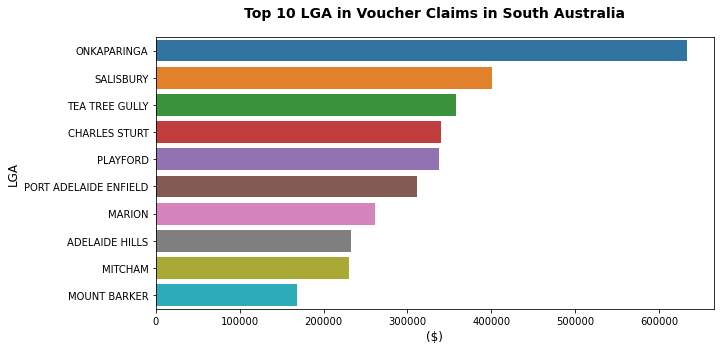

In [22]:
# plot top 10 LGA in South Australia
fig, ax =plt.subplots(figsize=(10,5),sharey=True)
sns.barplot(y="Participant_LGA", x="Voucher_Value", data=top10_vouchers_by_LGA_sa)

plt.xlabel("($)", size=12)
plt.ylabel("LGA", size=12)
plt.title("Top 10 LGA in Voucher Claims in South Australia", fontsize=14, fontweight='bold', y=1.05)

* From the above bar plot of top 10 LGA in vouchers claimed in South Australia, the top 5 regions participated in the Sport Voucher program are Onkaparinga (\\$632,865), Salisbury (\\$400,680), Tea Tree Gully (\\$357,310), Charles Sturt (\\$340,244) and Playford (\\$338,085).

## Distribution of vouchers by Sport in South Australia

In [23]:
# look at summary statistic of voucher values by sports
sa_vouchers_scores_clean.groupby('Voucher_Sport')["Voucher_Value"].describe()

,count,mean,std,min,25%,50%,75%,max
Voucher_Sport,,,,,,,,
Archery,34.0,50.000000,0.000000,50.0,50.0,50.0,50.0,50.0
Athletics,4306.0,49.991872,0.533373,15.0,50.0,50.0,50.0,50.0
Australian Rules,43342.0,49.663721,2.677766,10.0,50.0,50.0,50.0,50.0
BMX,138.0,50.000000,0.000000,50.0,50.0,50.0,50.0,50.0
Badminton,4.0,50.000000,0.000000,50.0,50.0,50.0,50.0,50.0
Baseball,805.0,49.167702,3.821639,30.0,50.0,50.0,50.0,50.0
Basketball,5340.0,49.622659,2.051256,20.0,50.0,50.0,50.0,50.0
Bowls,1.0,50.000000,NaN,50.0,50.0,50.0,50.0,50.0
Calisthenics,2383.0,50.000000,0.000000,50.0,50.0,50.0,50.0,50.0


* Since there are too many sports to look at, we focus on top 10 sports with highest voucher values claimed.

In [24]:
# find top 10 sports
vouchers_by_sport = sa_vouchers_scores_clean.groupby('Voucher_Sport',as_index=False)["Voucher_Value"].sum()
top10_vouchers_by_sport_sa = pd.DataFrame(vouchers_by_sport.sort_values(['Voucher_Value'], ascending=False).head(10))
top10_vouchers_by_sport_sa

,Voucher_Sport,Voucher_Value
2,Australian Rules,2152525
27,Netball,1049044
15,Football (Soccer),713840
17,Gymnastics,465335
6,Basketball,264985
1,Athletics,215265
43,Tennis,172610
8,Calisthenics,119150
18,Hockey,116438
9,Cricket,88550


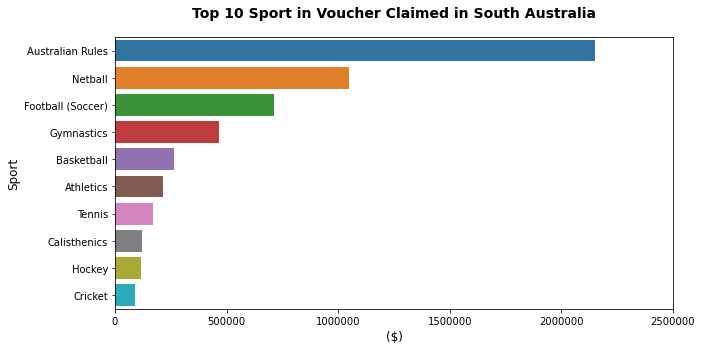

In [25]:
# plot top 10 Sport in South Australia
fig, ax =plt.subplots(figsize=(10,5),sharey=True)
sns.barplot(y="Voucher_Sport", x="Voucher_Value", data=top10_vouchers_by_sport_sa)

plt.xlabel("($)", size=12)
plt.ylabel("Sport", size=12)
plt.title("Top 10 Sport in Voucher Claimed in South Australia", fontsize=14, fontweight='bold', y=1.05)

# setting the xticks to have 0 decimal place to show all digits
xx, locs = plt.xticks()
ll = ['%.f' % a for a in xx]
plt.xticks(xx, ll)
plt.show()

* From the above bar plot of distribution of vouchers claimed by sports, the top 5 favorable sports in this Sport Voucher program are Australian Rules (\\$2,152,525), Netball (\\$1,049,044), Football (\\$713,840), Gymnastics (\\$465,335) and Basketball (\\$264,985).

## Distribution pattern of Vouchers for top 10 sports by LGA

* Let's focus on the distribution pattern of vauchers among the top 10 sports by LGA. The most popular sports in South Australia are Australian Rules, Netball, Football (Soccer), Gymnastics, Basketball, Athletics, Tennis, Calisthenics, Hockey, Cricket.

In [26]:
# filter records of top 10 sports
top10_sports = sa_vouchers_scores_clean[sa_vouchers_scores_clean['Voucher_Sport'].isin(['Australian Rules', 'Netball', 'Football (Soccer)','Gymnastics', 'Basketball','Athletics','Tennis','Calisthenics','Hockey','Cricket'])]
top10_sports.head()

,Participant_ID,Participant_Suburb,Club_Previous_Member,Participant_ATSI_Indicator,Participant_CALD_Indicator,Participant_Sex,Voucher_Value,Club_Name,Voucher_Sport,Participant_LGA,Participant_Electorate,Voucher_Completion_Date,Voucher_Claim_Year,IEO,IER,IRSAD,IRSD,Population
0,1000002,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Male,50,Flagstaff Hill Football Club,Australian Rules,ONKAPARINGA,FISHER,26/6/15 1:19,2015,996.0,996.0,975.0,993.0,159517.0
1,1000002,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Male,50,Flagstaff Hill Football Club,Australian Rules,ONKAPARINGA,FISHER,29/6/16 23:55,2016,996.0,996.0,975.0,993.0,159517.0
2,1000004,ABERFOYLE PARK,Not Registered Previously,Not ATSI,Not CALD,Female,50,Hub Gymnastics Club,Gymnastics,ONKAPARINGA,FISHER,21/4/16 3:37,2016,996.0,996.0,975.0,993.0,159517.0
3,1000004,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Female,50,Hub Gymnastics Club,Gymnastics,ONKAPARINGA,FISHER,30/3/17 0:47,2017,996.0,996.0,975.0,993.0,159517.0
4,1000005,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Female,50,Blackwood Community Recreation Association,Gymnastics,ONKAPARINGA,FISHER,20/7/15 2:50,2015,996.0,996.0,975.0,993.0,159517.0


In [27]:
# Group voucher values by sports and by LGA
top10_sports.groupby(['Voucher_Sport','Participant_LGA'])["Voucher_Value"].sum()

Voucher_Sport  Participant_LGA
Athletics      ADELAIDE             800
               ADELAIDE HILLS     10200
               ALEXANDRINA         3100
               BAROSSA             7900
               BARUNGA WEST          50
                                  ...  
Tennis         WALKERVILLE          600
               WATTLE RANGE         550
               WEST TORRENS        7900
               YANKALILLA           100
               YORKE PENINSULA      290
Name: Voucher_Value, Length: 490, dtype: int64

* To make analysis more clear and easy to understand, we focus on analysing the top 100 records in voucher values from the above grouped summary table.

In [28]:
# find top 100 voucher value records among these top 10 sports and LGA
df = top10_sports.groupby(['Voucher_Sport','Participant_LGA'])["Voucher_Value"].sum().reset_index()
top100_records = df.sort_values(['Voucher_Value'], ascending = False).head(100)
top100_records.head()

,Voucher_Sport,Participant_LGA,Voucher_Value
84,Australian Rules,ONKAPARINGA,261125
95,Australian Rules,SALISBURY,142550
87,Australian Rules,PLAYFORD,126100
88,Australian Rules,PORT ADELAIDE ENFIELD,120600
76,Australian Rules,MARION,116040


In [29]:
# add a column of 'voucher range' to create a classifier for below joint plot to indicate the among of voucher values claimed.
Voucher_Range = []
for value in top100_records["Voucher_Value"]: 
    if value <= 50000:
        Voucher_Range.append('\\$50,000 or less')
    elif value <= 100000:
        Voucher_Range.append('\\$50,001 - \\$100,000')
    elif value <= 150000:
        Voucher_Range.append('\\$100,001 - \\$150,000')
    elif value <= 200000:
        Voucher_Range.append('\\$150,001 - \\$200,000')
    elif value <= 250000:
        Voucher_Range.append('\\$200,001 - \\$250,000')
    else:
        Voucher_Range.append('> $250,000')
 
top100_records["Voucher_Range"] = Voucher_Range 
top100_records.head(10)

,Voucher_Sport,Participant_LGA,Voucher_Value,Voucher_Range
84,Australian Rules,ONKAPARINGA,261125,"> $250,000"
95,Australian Rules,SALISBURY,142550,"\$100,001 - \$150,000"
87,Australian Rules,PLAYFORD,126100,"\$100,001 - \$150,000"
88,Australian Rules,PORT ADELAIDE ENFIELD,120600,"\$100,001 - \$150,000"
76,Australian Rules,MARION,116040,"\$100,001 - \$150,000"
421,Netball,ONKAPARINGA,109900,"\$100,001 - \$150,000"
58,Australian Rules,CHARLES STURT,106590,"\$100,001 - \$150,000"
99,Australian Rules,TEA TREE GULLY,106250,"\$100,001 - \$150,000"
275,Football (Soccer),SALISBURY,98200,"\$50,001 - \$100,000"
78,Australian Rules,MITCHAM,96200,"\$50,001 - \$100,000"


Text(0.5, 1.02, 'Distribution pattern of Vouchers for top 10 sports by LGA in South Australia')

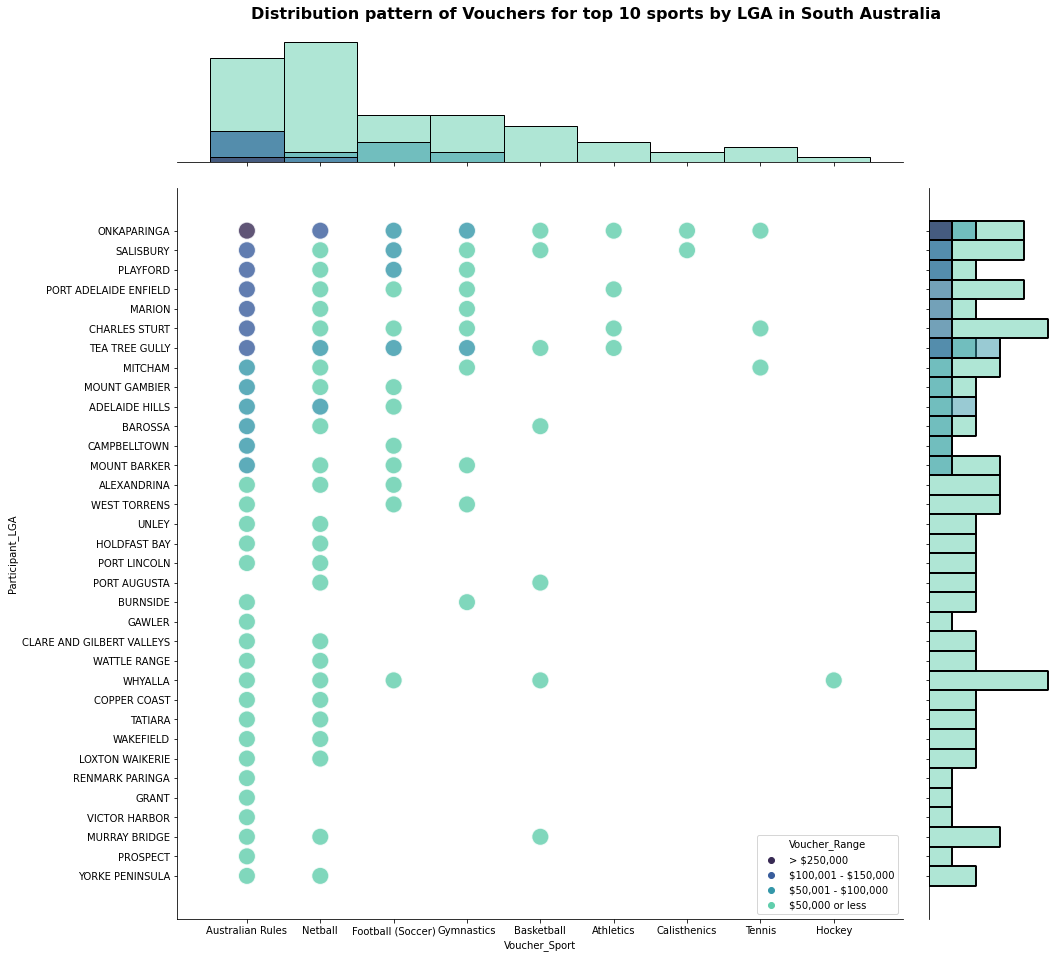

In [30]:
# create a joint plot for the distribution pattern of vouchers for top 10 sports by LGA, using voucher range as an indicator of the values claimed.
g = sns.JointGrid(data=top100_records, x="Voucher_Sport", y="Participant_LGA", hue="Voucher_Range", height=13, palette = 'mako')
g.plot_joint(sns.scatterplot, s=300, alpha=.8)
g.plot_marginals(sns.histplot)
g.fig.suptitle('Distribution pattern of Vouchers for top 10 sports by LGA in South Australia', y=1.02, fontsize=16, fontweight='bold')

* From the joint plot and summary table above, by looking at the distribution and the amount of voucher values, it is clear that Australian Rules and Netball are the most popular sports among most of the region in South Australia. Onkaparinga is the most active region in claiming sport voucher, followed by Tea Tree Gully, Charles Sturt and Salisbury.

## Voucher Usage by Electorates in South Australia

In [31]:
# create summary table for voucher usage by electorates in South Australia
column_names = ["Voucher count", "Voucher total"]
voucher_electorates = pd.DataFrame(columns = column_names)

voucher_electorates["Voucher count"] = sa_vouchers_scores_clean.groupby("Participant_Electorate")["Voucher_Value"].count()
voucher_electorates["Voucher total"] = sa_vouchers_scores_clean.groupby("Participant_Electorate")["Voucher_Value"].sum()
voucher_electorates["Population"] = sa_vouchers_scores_clean.groupby("Participant_Electorate")["Population"].mean().round(0).astype(int)
voucher_electorates["Voucher claimed/person"] = (voucher_electorates["Voucher total"]/voucher_electorates["Population"]).round(2)
voucher_electorates.reset_index(inplace=True)

voucher_electorates["State"] = ("South Australia")
voucher_electorates.head()

,Participant_Electorate,Voucher count,Voucher total,Population,Voucher claimed/person,State
0,ADELAIDE,1543,77135,17489,4.41,South Australia
1,ASHFORD,2518,125870,48754,2.58,South Australia
2,BRAGG,2117,105850,41342,2.56,South Australia
3,BRIGHT,2680,133958,53602,2.50,South Australia
4,CHAFFEY,2612,129719,8758,14.81,South Australia


In [32]:
voucher_electorates["Voucher claimed/person"].describe()

count    47.000000
mean      4.035745
std       5.179019
min       0.300000
25%       1.020000
50%       1.400000
75%       5.185000
max      23.600000
Name: Voucher claimed/person, dtype: float64

* There are 47 electorates in South Australia. The average voucher claimed is \\$4.04 per person. Maximum amount is \\$23.60 per person and minimum aount is \\$0.3 per person.

In [33]:
# Find top 10 electorates in voucher claims
top10_voucher_electorates = (voucher_electorates.sort_values(by=['Voucher claimed/person'], ascending=False, inplace=False)).head(10)
top10_voucher_electorates

,Participant_Electorate,Voucher count,Voucher total,Population,Voucher claimed/person,State
14,FLINDERS,4155,199075,8437,23.60,South Australia
16,FROME,2367,113615,7124,15.95,South Australia
40,STUART,2893,142730,9244,15.44,South Australia
4,CHAFFEY,2612,129719,8758,14.81,South Australia
18,GOYDER,2944,144429,11412,12.66,South Australia
27,MACKILLOP,3074,151836,14654,10.36,South Australia
32,MOUNT GAMBIER,4024,200845,21844,9.19,South Australia
39,SCHUBERT,3569,175520,20726,8.47,South Australia
17,GILES,3025,146132,18313,7.98,South Australia
21,HEYSEN,6008,299880,41247,7.27,South Australia


In [34]:
# Find least 10 electorates in voucher claims
least10_voucher_electorates = (voucher_electorates.sort_values(by=['Voucher claimed/person'], ascending=True, inplace=False)).head(10)
least10_voucher_electorates

,Participant_Electorate,Voucher count,Voucher total,Population,Voucher claimed/person,State
9,DUNSTAN,379,18950,64116,0.30,South Australia
46,WRIGHT,917,45810,129067,0.35,South Australia
11,ENFIELD,1046,52135,112797,0.46,South Australia
38,REYNELL,1676,83675,159517,0.52,South Australia
42,TORRENS,1480,73980,112797,0.66,South Australia
28,MAWSON,2256,112605,159517,0.71,South Australia
7,CROYDON,1684,84085,106283,0.79,South Australia
35,PLAYFORD,2110,105480,124780,0.85,South Australia
20,HARTLEY,1602,80070,91064,0.88,South Australia
41,TAYLOR,1849,92295,95275,0.97,South Australia


<AxesSubplot:title={'center':'Top 10 Electorates vs Least 10 Electorates in Voucher Claimed per Person in South Australia'}, xlabel='Participant_Electorate', ylabel='Voucher claimed/person'>

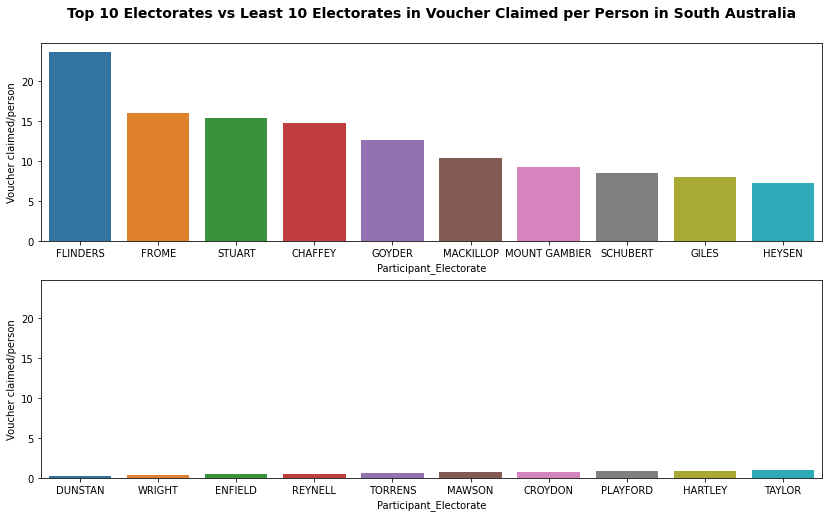

In [35]:
# create plots for comparison in voucher usage among electorates
fig, ax =plt.subplots(2,1, figsize=(14,8),sharey=True)
plt.title("Top 10 Electorates vs Least 10 Electorates in Voucher Claimed per Person in South Australia", fontsize=14, fontweight='bold',loc = 'center',y=2.3)
sns.barplot(x="Participant_Electorate", y="Voucher claimed/person", data=top10_voucher_electorates,ax=ax[0])
sns.barplot(x="Participant_Electorate", y="Voucher claimed/person", data=least10_voucher_electorates,ax=ax[1])

* The above plot shows the comparison in voucher claimed per person in top 10 electorates versus least 10 electorates at the smae scale (y-axis). Voucher clamied per person of top 10 electorates range from \\$7.27 to \\$23.60. Flinders has the highest voucher claimed per person (\\$23.60). On the other hand, Voucher clamied per person of least 10 electorates range from \\$0.3 to \\$0.97. Dunstan has the lowest voucher claimed per person (\\$0.30).

## Relationship between SEIFA Measures and Voucher Use in South Australia

The Socio-Economic Indexes for Areas (SEIFA) data consists of four indexes:
* The Index of Relative Socio-Economic Disadvantage (IRSD)
* The Index of Relative Socio-Economic Advantage and Disadvantage (IRSAD)
* The Index of Education and Occupation (IEO)
* The Index of Economic Resources (IER)

In [36]:
# sum up voucher values by LGA for analysis
total_voucher_LGA = sa_vouchers_scores_clean.groupby("Participant_LGA",as_index=False)['Voucher_Value'].sum()
total_voucher_LGA

,Participant_LGA,Voucher_Value
0,ADELAIDE,14800
1,ADELAIDE HILLS,232370
2,ALEXANDRINA,146780
3,BAROSSA,142685
4,BARUNGA WEST,15735
...,...,...
57,WEST TORRENS,140220
58,WHYALLA,117897
59,WUDINNA,10190
60,YANKALILLA,21950


In [37]:
# combine data of total voucher values with SEIFA measures by LGA
total_voucher_seifa = total_voucher_LGA.join(LGA_scores, on='Participant_LGA')
total_voucher_seifa

,Participant_LGA,Voucher_Value,IEO,IER,IRSAD,IRSD,Population
0,ADELAIDE,14800,874.0,874.0,1036.0,1013.0,19606.0
1,ADELAIDE HILLS,232370,1083.0,1083.0,1077.0,1081.0,38601.0
2,ALEXANDRINA,146780,1000.0,1000.0,969.0,987.0,23693.0
3,BAROSSA,142685,1028.0,1028.0,997.0,1017.0,22174.0
4,BARUNGA WEST,15735,981.0,981.0,940.0,954.0,2467.0
...,...,...,...,...,...,...,...
57,WEST TORRENS,140220,949.0,949.0,989.0,998.0,54932.0
58,WHYALLA,117897,905.0,905.0,897.0,905.0,22070.0
59,WUDINNA,10190,1008.0,1008.0,999.0,1023.0,1256.0
60,YANKALILLA,21950,990.0,990.0,957.0,972.0,4406.0


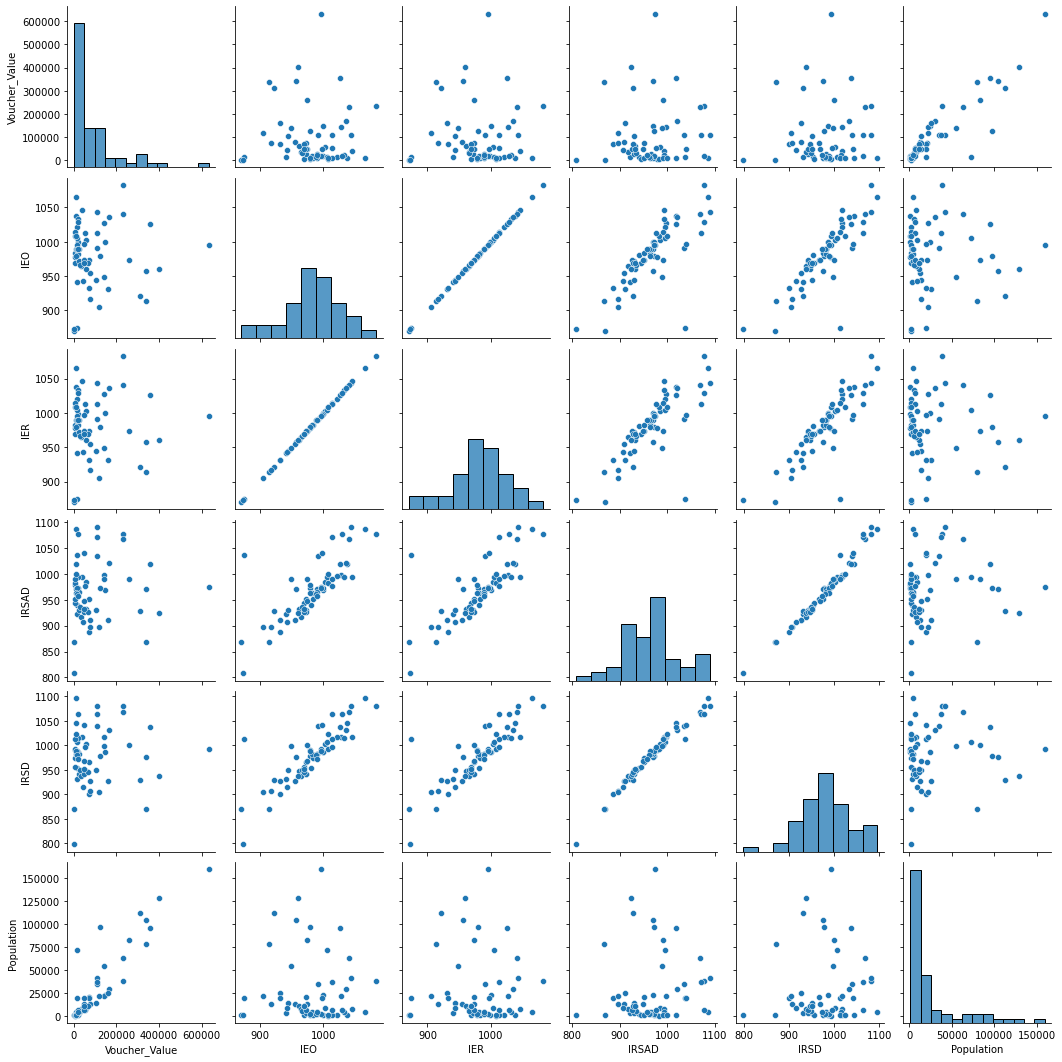

In [38]:
# plot pairwise relationships in the dataset
sns.pairplot(total_voucher_seifa)

In [39]:
# check correlation between voucher values and SEIFA measures
total_voucher_seifa.corr()

,Voucher_Value,IEO,IER,IRSAD,IRSD,Population
Voucher_Value,1.000000,0.001214,0.001214,0.047124,0.028359,0.910199
IEO,0.001214,1.000000,1.000000,0.781360,0.848105,-0.035736
IER,0.001214,1.000000,1.000000,0.781360,0.848105,-0.035736
IRSAD,0.047124,0.781360,0.781360,1.000000,0.985054,0.092233
IRSD,0.028359,0.848105,0.848105,0.985054,1.000000,0.055094
Population,0.910199,-0.035736,-0.035736,0.092233,0.055094,1.000000


* From the pairplots and correlation table above, the relationships between voucher value and SEIFA measures are weak (all with coefficient below 0.05). Meanwhile, a significant positive correlation between voucher value and population (coefficent = 0.91) is observed. 

### Linear Regression Model

In [40]:
## Linear Regression Model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [41]:
train, test = train_test_split(total_voucher_seifa, test_size=0.2, random_state=142)
print(train.shape)
print(test.shape)

(49, 7)
(13, 7)


In [42]:
X_train = train[['IEO','IER','IRSAD','IRSD']]
y_train = train['Voucher_Value']

X_test = test[['IEO','IER','IRSAD','IRSD']]
y_test = test['Voucher_Value']

print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (49, 4)
y_train shape:  (49,)
X_test shape:  (13, 4)
y_test shape:  (13,)


In [43]:
model = LinearRegression()
model.fit(X_train, y_train)
pd.DataFrame(model.coef_, X_test.columns, columns = ['Coefficient'])

,Coefficient
IEO,60.980221
IER,60.980221
IRSAD,1842.925402
IRSD,-1809.749735


[ 95543.26518691  99874.35577017  78859.75175803  87210.42808489
 127043.55974974 155667.36448646 101821.04833878 104156.05567454
  86197.76305985  96555.41557223  92323.25705735  96822.28453672
  90472.96090079]


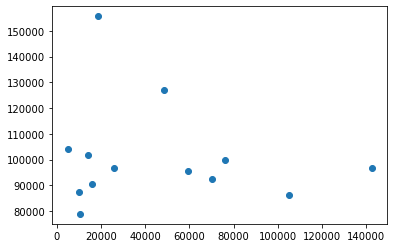

In [44]:
y_pred = model.predict(X_test) 
print(y_pred)
plt.scatter(y_test, y_pred)

In [45]:
print("MSE: ", mean_squared_error(y_test, y_pred))
print("R-square: ", r2_score(y_test, y_pred))

MSE:  5256041697.419701
R-square:  -2.1403929539500246


* R-square is -2.14 which indicate SEIFA measures is not a good predictor of voucher values in South Australia.
* However, since the pairplot and correlation table shows only population has significant correlation with voucher values, it is worth to  conduct linear regression between just population and voucher values to see the difference.

In [46]:
X_train = train[['Population']]
y_train = train['Voucher_Value']

X_test = test[['Population']]
y_test = test['Voucher_Value']

print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (49, 1)
y_train shape:  (49,)
X_test shape:  (13, 1)
y_test shape:  (13,)


In [47]:
model = LinearRegression()
model.fit(X_train, y_train)
pd.DataFrame(model.coef_, X_test.columns, columns = ['Coefficient'])

,Coefficient
Population,3.057402


[46989.11125844 55280.78509247 18995.53986302 16384.51867782
 73539.58897773 33970.69415472 23199.46741531 17751.17730755
 55601.81228737 26293.55809379 72903.64939163 80339.25070593
 17830.66975581]


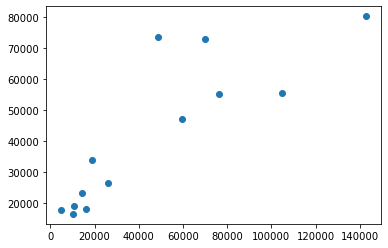

In [48]:
y_pred = model.predict(X_test) 
print(y_pred)
plt.scatter(y_test, y_pred)

In [49]:
print("MSE: ", mean_squared_error(y_test, y_pred))
print("R-square: ", r2_score(y_test, y_pred))

MSE:  625297146.3843172
R-square:  0.626395895299998


* R-square is 0.626 which indicates a good positive relationship between population and voucher values.

# Challenge - Queensland

_Note: this is an extra task that you might take on to get a better grade for your portfolio.  You can get a good pass grade without doing this._ 

Queensland has a similar program called [Get Started](https://data.gov.au/dataset/ds-qld-3118838a-d425-48fa-bfc9-bc615ddae44e/details?q=get%20started%20vouchers) and we can retrieve data from their program in a similar format.  

The file [round1-redeemed_get_started_vouchers.csv](files/round1-redeemed_get_started_vouchers.csv) contains records of the vouchers issued in Queensland. The date of this data is not included but the program started in 2015 so it is probably from around then.  

The data includes the LGA of the individual but the name of the activity is slightly different.  To do a comparable analysis you would need to map the activity names onto those from South Australia. 

## Data Exploring and Data Cleaning

In [50]:
qld_vouchers = pd.read_csv('data/round1-redeemed_get_started_vouchers.csv')
qld_vouchers.head()

,Application Number,Voucher Number,Child Age (at time of Application),Gender,Has your child played sport before?,Participation Activity,Club Name,Club Suburb/Town,Club Local Government Area Name,Club State Electoral District Name,Parent Suburb/Town,Total Payment
0,2000012253,Q89QDUXP,10,NaN,Yes,*Other,Queensland Police-Citizens Youth Welfare Assoc...,Airlie Beach,Whitsunday (R),Whitsunday,Jubilee Pocket,60.01
1,2000001727,593F6Y41,5,NaN,No,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Leichhardt,150.00
2,2000013464,PH2R4RTT,5,NaN,No,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Woodridge,150.00
3,2000009270,035SE2H5,5,NaN,Yes,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Yatala,150.00
4,2000007273,NP6C4729,6,NaN,No,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Alexandra Hills,150.00


In [51]:
# Join the QLD data with the LGA data as before to get population and SIEFA data integrated
qld_vouchers['LGA'] = qld_vouchers['Club Local Government Area Name'].str.replace(' \([RC]+\)', '').str.upper()
qld_vouchers_scores = qld_vouchers.join(LGA_scores, on='LGA')
qld_vouchers_scores.head()

,Application Number,Voucher Number,Child Age (at time of Application),Gender,Has your child played sport before?,Participation Activity,Club Name,Club Suburb/Town,Club Local Government Area Name,Club State Electoral District Name,Parent Suburb/Town,Total Payment,LGA,IEO,IER,IRSAD,IRSD,Population
0,2000012253,Q89QDUXP,10,NaN,Yes,*Other,Queensland Police-Citizens Youth Welfare Assoc...,Airlie Beach,Whitsunday (R),Whitsunday,Jubilee Pocket,60.01,WHITSUNDAY,989.0,989.0,966.0,982.0,31393.0
1,2000001727,593F6Y41,5,NaN,No,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Leichhardt,150.00,BRISBANE,1018.0,1018.0,1057.0,1048.0,1042074.0
2,2000013464,PH2R4RTT,5,NaN,No,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Woodridge,150.00,BRISBANE,1018.0,1018.0,1057.0,1048.0,1042074.0
3,2000009270,035SE2H5,5,NaN,Yes,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Yatala,150.00,BRISBANE,1018.0,1018.0,1057.0,1048.0,1042074.0
4,2000007273,NP6C4729,6,NaN,No,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Alexandra Hills,150.00,BRISBANE,1018.0,1018.0,1057.0,1048.0,1042074.0


In [52]:
qld_vouchers_scores.shape

(9507, 18)

In [53]:
print(qld_vouchers_scores.columns)

Index(['Application Number', 'Voucher Number',
       'Child Age (at time of Application)', 'Gender',
       'Has your child played sport before?', 'Participation Activity',
       'Club Name', 'Club Suburb/Town', 'Club Local Government Area Name',
       'Club State Electoral District  Name', 'Parent Suburb/Town',
       'Total Payment', 'LGA', 'IEO', 'IER', 'IRSAD', 'IRSD', 'Population'],
      dtype='object')


In [54]:
# check NA values
qld_vouchers_scores.isna().sum()

Application Number                        0
Voucher Number                            0
Child Age (at time of Application)        0
Gender                                 9507
Has your child played sport before?       4
Participation Activity                    0
Club Name                                 0
Club Suburb/Town                          0
Club Local Government Area Name           0
Club State Electoral District  Name       0
Parent Suburb/Town                        0
Total Payment                             0
LGA                                       0
IEO                                     519
IER                                     519
IRSAD                                   519
IRSD                                    519
Population                              519
dtype: int64

* Since gender is empty for the whole column, we drop it from the dataset.

In [55]:
# drop useless column and na values
qld_vouchers_scores2 = qld_vouchers_scores.drop(columns=['Gender'])
qld_vouchers_scores_clean = qld_vouchers_scores2.dropna()
qld_vouchers_scores_clean.head()

,Application Number,Voucher Number,Child Age (at time of Application),Has your child played sport before?,Participation Activity,Club Name,Club Suburb/Town,Club Local Government Area Name,Club State Electoral District Name,Parent Suburb/Town,Total Payment,LGA,IEO,IER,IRSAD,IRSD,Population
0,2000012253,Q89QDUXP,10,Yes,*Other,Queensland Police-Citizens Youth Welfare Assoc...,Airlie Beach,Whitsunday (R),Whitsunday,Jubilee Pocket,60.01,WHITSUNDAY,989.0,989.0,966.0,982.0,31393.0
1,2000001727,593F6Y41,5,No,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Leichhardt,150.00,BRISBANE,1018.0,1018.0,1057.0,1048.0,1042074.0
2,2000013464,PH2R4RTT,5,No,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Woodridge,150.00,BRISBANE,1018.0,1018.0,1057.0,1048.0,1042074.0
3,2000009270,035SE2H5,5,Yes,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Yatala,150.00,BRISBANE,1018.0,1018.0,1057.0,1048.0,1042074.0
4,2000007273,NP6C4729,6,No,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Alexandra Hills,150.00,BRISBANE,1018.0,1018.0,1057.0,1048.0,1042074.0


In [56]:
qld_vouchers_scores_clean.shape

(8984, 17)

In [57]:
qld_vouchers_scores_clean.describe(include="all")

,Application Number,Voucher Number,Child Age (at time of Application),Has your child played sport before?,Participation Activity,Club Name,Club Suburb/Town,Club Local Government Area Name,Club State Electoral District Name,Parent Suburb/Town,Total Payment,LGA,IEO,IER,IRSAD,IRSD,Population
count,8.984000e+03,8984,8984.000000,8984,8984,8984,8984,8984,8984,8984,8984.000000,8984,8984.000000,8984.000000,8984.000000,8984.000000,8.984000e+03
unique,NaN,8984,NaN,2,66,923,421,35,88,917,NaN,33,NaN,NaN,NaN,NaN,NaN
top,NaN,QDA5PUJE,NaN,Yes,Rugby League,NERANG JUNIOR RUGBY LEAGUE FOOTBALL CLUB Incor...,Nerang,Gold Coast (C),Gaven,Nerang,NaN,GOLD COAST,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,7250,2665,205,246,1699,368,136,NaN,1699,NaN,NaN,NaN,NaN,NaN
mean,2.000007e+09,NaN,10.063446,NaN,NaN,NaN,NaN,NaN,NaN,NaN,144.125650,NaN,1003.904052,1003.904052,996.980187,999.860307,3.979315e+05
std,3.950571e+03,NaN,3.052800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.071601,NaN,22.205919,22.205919,40.143766,34.451561,3.129051e+05
min,2.000000e+09,NaN,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,947.000000,947.000000,908.000000,917.000000,2.209000e+03
25%,2.000004e+09,NaN,8.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,NaN,1001.000000,1001.000000,965.000000,971.000000,1.668660e+05
50%,2.000007e+09,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,NaN,1008.000000,1008.000000,1001.000000,1007.000000,3.068890e+05
75%,2.000010e+09,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,NaN,1018.000000,1018.000000,1016.000000,1014.000000,4.945910e+05


### Rename columns in Queensland's dataset to match with the data name in South Australia's dataset:

In [58]:
qld_vouchers_scores_clean.rename(columns={'Participation Activity': 'Voucher_Sport', 'Total Payment': 'Voucher_Value', 'LGA': 'Participant_LGA', 'Club State Electoral District  Name':'Participant_Electorate'}, inplace=True)
qld_vouchers_scores_clean.head()

,Application Number,Voucher Number,Child Age (at time of Application),Has your child played sport before?,Voucher_Sport,Club Name,Club Suburb/Town,Club Local Government Area Name,Participant_Electorate,Parent Suburb/Town,Voucher_Value,Participant_LGA,IEO,IER,IRSAD,IRSD,Population
0,2000012253,Q89QDUXP,10,Yes,*Other,Queensland Police-Citizens Youth Welfare Assoc...,Airlie Beach,Whitsunday (R),Whitsunday,Jubilee Pocket,60.01,WHITSUNDAY,989.0,989.0,966.0,982.0,31393.0
1,2000001727,593F6Y41,5,No,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Leichhardt,150.00,BRISBANE,1018.0,1018.0,1057.0,1048.0,1042074.0
2,2000013464,PH2R4RTT,5,No,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Woodridge,150.00,BRISBANE,1018.0,1018.0,1057.0,1048.0,1042074.0
3,2000009270,035SE2H5,5,Yes,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Yatala,150.00,BRISBANE,1018.0,1018.0,1057.0,1048.0,1042074.0
4,2000007273,NP6C4729,6,No,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Alexandra Hills,150.00,BRISBANE,1018.0,1018.0,1057.0,1048.0,1042074.0


### Replace sports name to match with South Australia's dataset:

In [59]:
#check top 10 sports in Queensland to see which name need to be replaced to match with the sports name in South Australia
qld_vouchers_scores_clean.groupby('Voucher_Sport')['Voucher_Value'].sum().sort_values(ascending=False).head(10)


Voucher_Sport
Rugby League           381970.00
Football (Soccer)      288799.00
Netball                182202.00
Gymnastics              72419.92
Australian Football     71842.00
Basketball              52053.00
Rugby Union             47420.00
Hockey                  37943.00
Bushwalking             22050.00
Swimming                16462.00
Name: Voucher_Value, dtype: float64

In [60]:
# only "Australian Football" needed to be replaced by "Australian Rules"
qld_vouchers_scores_clean.replace("Australian Football", "Australian Rules",inplace=True)

## Comparing Distribution of Vouchers by LGA in Queensland vs South Australia

In [61]:
# find top 10 LGA in Queensland
vouchers_by_LGA_ql = qld_vouchers_scores_clean.groupby('Participant_LGA', as_index=False)["Voucher_Value"].sum()
top10_vouchers_by_LGA_ql = pd.DataFrame(vouchers_by_LGA_ql.sort_values(["Voucher_Value"],ascending=False).head(10))

In [62]:
# add state column to both South Australia and queensland dataset and combine them into one
top10_vouchers_by_LGA_ql["State"] = ("Queensland")
top10_vouchers_by_LGA_ql
top10_vouchers_by_LGA_sa["State"] = ("South Australia")
top10_vouchers_by_LGA_sa

top10_vouchers_LGA_SA_QL = pd.concat([top10_vouchers_by_LGA_sa,top10_vouchers_by_LGA_ql])
top10_vouchers_LGA_SA_QL.sort_values('Voucher_Value', ascending = False)

,Participant_LGA,Voucher_Value,State
34,ONKAPARINGA,632865.00,South Australia
45,SALISBURY,400680.00,South Australia
49,TEA TREE GULLY,357310.00,South Australia
8,CHARLES STURT,340244.00,South Australia
37,PLAYFORD,338085.00,South Australia
38,PORT ADELAIDE ENFIELD,311069.00,South Australia
26,MARION,261383.00,South Australia
9,GOLD COAST,250426.00,Queensland
1,ADELAIDE HILLS,232370.00,South Australia
28,MITCHAM,230848.00,South Australia


Text(0.5, 1.05, 'Top 10 LGA in South Australia vs Top 10 LGA in Queensland')

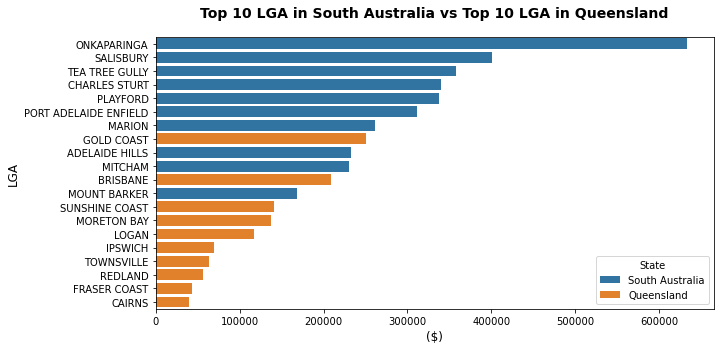

In [63]:
# plot top 10 LGA in Queensland
fig, ax =plt.subplots(figsize=(10,5),sharey=True)
sns.barplot(x="Voucher_Value", y="Participant_LGA", hue="State", 
            data=top10_vouchers_LGA_SA_QL, 
            order=top10_vouchers_LGA_SA_QL.sort_values('Voucher_Value', ascending = False).Participant_LGA, 
            dodge=False)

plt.xlabel("($)", size=12)
plt.ylabel("LGA", size=12)
plt.title("Top 10 LGA in South Australia vs Top 10 LGA in Queensland", fontsize=14, fontweight='bold', y=1.05)

## Comparing Distribution of vouchers by Sports in Queensland vs South Australia

In [64]:
# find top 10 sports
vouchers_by_sport_ql = qld_vouchers_scores_clean.groupby('Voucher_Sport',as_index=False)["Voucher_Value"].sum()
top10_vouchers_by_sport_ql = pd.DataFrame(vouchers_by_sport_ql.sort_values(['Voucher_Value'], ascending=False).head(10))

In [65]:
# add state column to both South Australia and queensland dataset and combine them into one
top10_vouchers_by_sport_ql["State"] = ("Queensland")
top10_vouchers_by_sport_ql

top10_vouchers_by_sport_sa["State"] = ("South Australia")
top10_vouchers_by_sport_sa

top10_vouchers_by_sport_SA_QL = pd.concat([top10_vouchers_by_sport_sa,top10_vouchers_by_sport_ql])
top10_vouchers_by_sport_SA_QL.sort_values('Voucher_Value', ascending = False)

,Voucher_Sport,Voucher_Value,State
2,Australian Rules,2152525.00,South Australia
27,Netball,1049044.00,South Australia
15,Football (Soccer),713840.00,South Australia
17,Gymnastics,465335.00,South Australia
46,Rugby League,381970.00,Queensland
21,Football (Soccer),288799.00,Queensland
6,Basketball,264985.00,South Australia
1,Athletics,215265.00,South Australia
37,Netball,182202.00,Queensland
43,Tennis,172610.00,South Australia


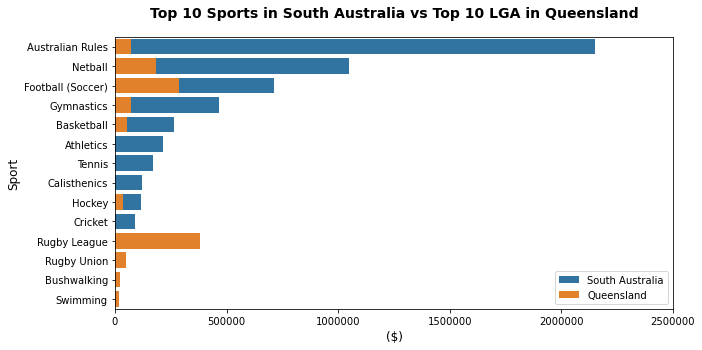

In [66]:
# plot top 10 Sport in South Australia
fig, ax =plt.subplots(figsize=(10,5),sharey=True)
sns.barplot(x="Voucher_Value", y="Voucher_Sport", hue="State",
            data=top10_vouchers_by_sport_SA_QL, 
            dodge=False)

plt.xlabel("($)", size=12)
plt.ylabel("Sport", size=12)
plt.title("Top 10 Sports in South Australia vs Top 10 LGA in Queensland", fontsize=14, fontweight='bold', y=1.05)
plt.legend(loc="lower right")

# setting the xticks to have 0 decimal place to show all digits
xx, locs = plt.xticks()
ll = ['%.0f' % a for a in xx]
plt.xticks(xx, ll)
plt.show()

## Distribution pattern of Vouchers for top 10 sports by LGA in Queensland

In [67]:
# filter records of top 10 sports
top10_sports_ql = qld_vouchers_scores_clean[qld_vouchers_scores_clean['Voucher_Sport'].isin(['Rugby League', 'Football (Soccer)','Netball','Gymnastics', 'Australian Rules','Basketball', 'Rugby Union','Hockey','Bushwalking','Swimming'])]
top10_sports_ql.head()

,Application Number,Voucher Number,Child Age (at time of Application),Has your child played sport before?,Voucher_Sport,Club Name,Club Suburb/Town,Club Local Government Area Name,Participant_Electorate,Parent Suburb/Town,Voucher_Value,Participant_LGA,IEO,IER,IRSAD,IRSD,Population
117,2000008286,HZ7MH8FN,5,Yes,Australian Rules,Sandgate Junior Australian Football Club Inc,Taigum,Brisbane (C),Sandgate,Taigum,55.0,BRISBANE,1018.0,1018.0,1057.0,1048.0,1042074.0
118,2000012609,KF0C5C25,5,Yes,Australian Rules,Carrara Junior Australian Football Club Incorp...,Carrara,Gold Coast (C),Gaven,Highland Park,60.0,GOLD COAST,1008.0,1008.0,1016.0,1014.0,494591.0
119,2000003075,GPCSWE4W,6,No,Australian Rules,Logan Cobras Junior AFL Inc,Tanah Merah,Logan (C),Waterford,Loganholme,60.0,LOGAN,1001.0,1001.0,965.0,971.0,278080.0
120,2000002642,TV5I59PO,6,Yes,Australian Rules,University of Southern Queensland Australian F...,Darling Heights,Toowoomba (R),Condamine,Westbrook,75.0,TOOWOOMBA,995.0,995.0,980.0,993.0,151215.0
121,2000002662,LY5WRHWQ,6,Yes,Australian Rules,University of Southern Queensland Australian F...,Darling Heights,Toowoomba (R),Condamine,Westbrook,75.0,TOOWOOMBA,995.0,995.0,980.0,993.0,151215.0


In [68]:
# Group voucher values by sports and by LGA
top10_sports_ql.groupby(['Voucher_Sport','Participant_LGA'])["Voucher_Value"].sum()

Voucher_Sport     Participant_LGA
Australian Rules  BRISBANE            9515.0
                  BUNDABERG            300.0
                  CAIRNS              3505.0
                  FRASER COAST        1848.0
                  GOLD COAST         24115.0
                                      ...   
Swimming          SOUTHERN DOWNS       100.0
                  SUNSHINE COAST       300.0
                  TOOWOOMBA            150.0
                  TOWNSVILLE           600.0
                  WESTERN DOWNS        900.0
Name: Voucher_Value, Length: 178, dtype: float64

In [69]:
# find top 100 voucher value records among these top 10 sports and LGA
df_ql = top10_sports_ql.groupby(['Voucher_Sport','Participant_LGA'])["Voucher_Value"].sum().reset_index()
top100_records_ql = df_ql.sort_values(['Voucher_Value'], ascending = False).head(100)
top100_records_ql.head()

,Voucher_Sport,Participant_LGA,Voucher_Value
131,Rugby League,GOLD COAST,89870.0
35,Football (Soccer),BRISBANE,55345.0
136,Rugby League,LOGAN,45020.0
55,Football (Soccer),SUNSHINE COAST,45005.0
138,Rugby League,MORETON BAY,44670.0


In [70]:
# add a column of 'voucher range' to create a classifier for below joint plot to indicate the among of voucher values claimed.
Voucher_Range = []
for value in top100_records_ql["Voucher_Value"]: 
    if value <= 50000:
        Voucher_Range.append('\\$50,000 or less')
    elif value <= 100000:
        Voucher_Range.append('\\$50,001 - \\$100,000')
    elif value <= 150000:
        Voucher_Range.append('\\$100,001 - \\$150,000')
    elif value <= 200000:
        Voucher_Range.append('\\$150,001 - \\$200,000')
    elif value <= 250000:
        Voucher_Range.append('\\$200,001 - \\$250,000')
    else:
        Voucher_Range.append('> $250,000')
 
top100_records_ql["Voucher_Range"] = Voucher_Range 
top100_records_ql.head(10)

,Voucher_Sport,Participant_LGA,Voucher_Value,Voucher_Range
131,Rugby League,GOLD COAST,89870.0,"\$50,001 - \$100,000"
35,Football (Soccer),BRISBANE,55345.0,"\$50,001 - \$100,000"
136,Rugby League,LOGAN,45020.0,"\$50,000 or less"
55,Football (Soccer),SUNSHINE COAST,45005.0,"\$50,000 or less"
138,Rugby League,MORETON BAY,44670.0,"\$50,000 or less"
42,Football (Soccer),GOLD COAST,42875.0,"\$50,000 or less"
123,Rugby League,BRISBANE,35980.0,"\$50,000 or less"
133,Rugby League,IPSWICH,34950.0,"\$50,000 or less"
112,Netball,MORETON BAY,32660.0,"\$50,000 or less"
147,Rugby League,SUNSHINE COAST,31470.0,"\$50,000 or less"


Text(0.5, 1.02, 'Distribution pattern of Vouchers for top 10 sports by LGA in Queensland')

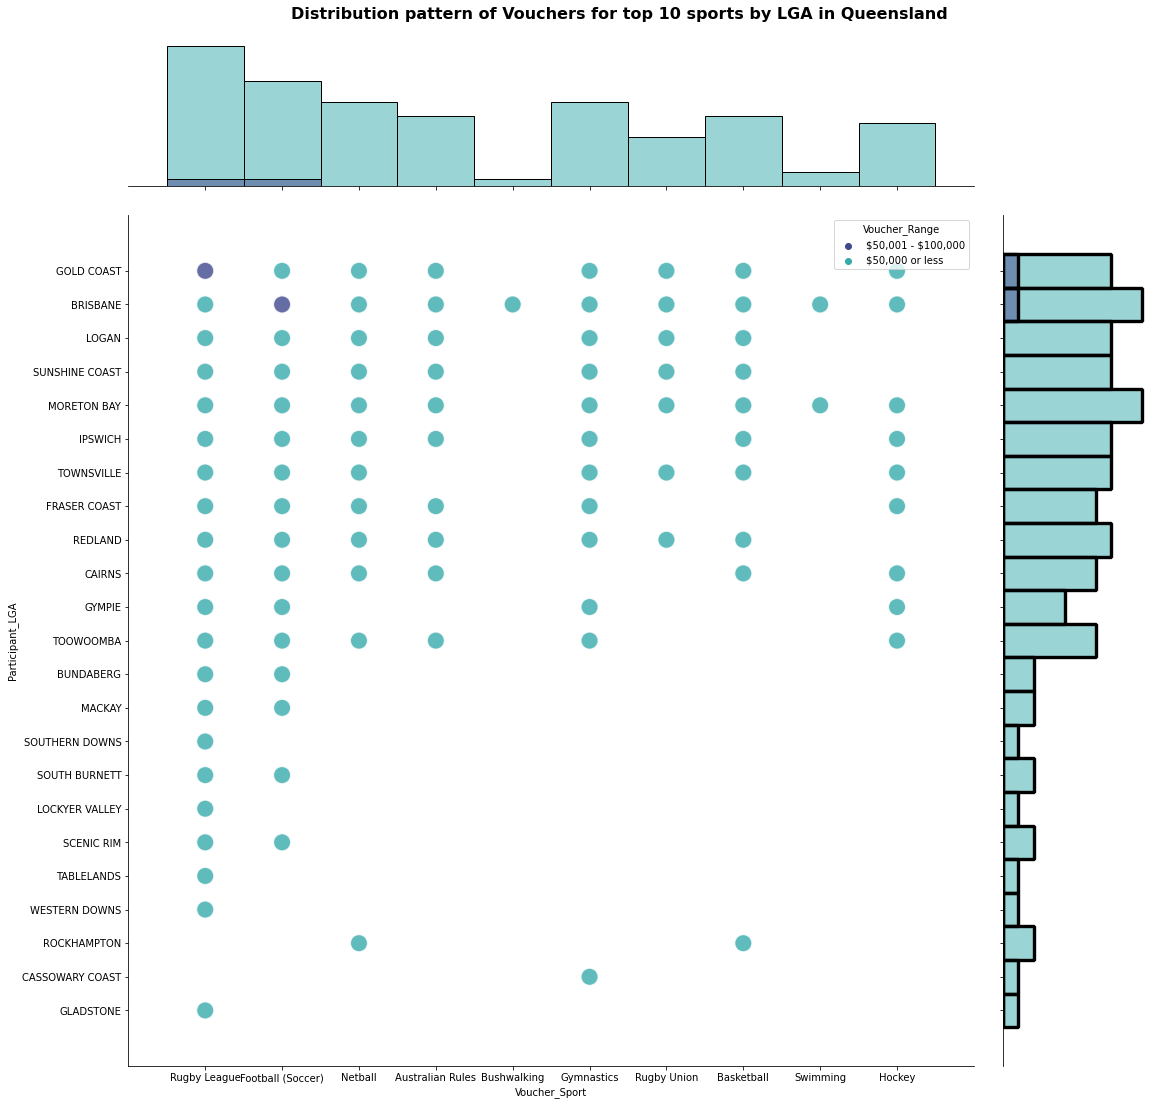

In [71]:
# create a joint plot for the distribution pattern of vouchers for top 10 sports by LGA, using voucher range as an indicator of the values claimed.
g = sns.JointGrid(data=top100_records_ql, x="Voucher_Sport", y="Participant_LGA", hue="Voucher_Range", height=15, palette = 'mako')
g.plot_joint(sns.scatterplot, s=300, alpha=.8)
g.plot_marginals(sns.histplot)
g.fig.suptitle('Distribution pattern of Vouchers for top 10 sports by LGA in Queensland', y=1.02, fontsize=16, fontweight='bold')

* From the joint plot above, Rugby League and Football (Soccer) are the most popular sports among most of the region in Queensland. Gold Coast is the most active region in claiming sport voucher, followed by Brisbane, Logan and Sunshine Coast.
* Recall that Australian Rules and Netball are the most popular sports among most of the region in South Australia. Onkaparinga is the most active region in claiming sport voucher, followed by Tea Tree Gully, Charles Sturt and Salisbury.

## Voucher Usage by Electorates in Queensland

In [72]:
# create summary table for voucher usage by electorates in Queensland
column_names = ["Voucher count", "Voucher total"]
voucher_electorates_ql = pd.DataFrame(columns = column_names)

voucher_electorates_ql["Voucher count"] = qld_vouchers_scores_clean.groupby("Participant_Electorate")["Voucher_Value"].count()
voucher_electorates_ql["Voucher total"] = qld_vouchers_scores_clean.groupby("Participant_Electorate")["Voucher_Value"].sum()
voucher_electorates_ql["Population"] = qld_vouchers_scores_clean.groupby("Participant_Electorate")["Population"].mean().round(0).astype(int)
voucher_electorates_ql["Voucher claimed/person"] = (voucher_electorates_ql["Voucher total"]/voucher_electorates_ql["Population"]).round(2)
voucher_electorates_ql.reset_index(inplace=True)

voucher_electorates_ql["State"] = ("Queensland")
voucher_electorates_ql.head()

,Participant_Electorate,Voucher count,Voucher total,Population,Voucher claimed/person,State
0,Albert,92,13640.0,494591,0.03,Queensland
1,Algester,34,4987.0,974663,0.01,Queensland
2,Ashgrove,31,4546.0,1042074,0.00,Queensland
3,Aspley,75,11250.0,1042074,0.01,Queensland
4,Barron River,40,5950.0,156176,0.04,Queensland


In [73]:
voucher_electorates_ql["Voucher claimed/person"].describe()

count    88.000000
mean      0.074773
std       0.083693
min       0.000000
25%       0.020000
50%       0.050000
75%       0.100000
max       0.540000
Name: Voucher claimed/person, dtype: float64

* There are 88 electorates in Queensland. The average voucher claimed is \\$0.07 per person. Maximum amount is \\$0.54 per person and minimum aount is \\$0 per person.

In [74]:
# Find top 10 electorates in voucher claims
top10_voucher_electorates_ql = (voucher_electorates_ql.sort_values(by=['Voucher claimed/person'], ascending=False, inplace=False)).head(10)
top10_voucher_electorates_ql

,Participant_Electorate,Voucher count,Voucher total,Population,Voucher claimed/person,State
33,Gympie,183,24743.0,45749,0.54,Queensland
72,Southern Downs,73,10264.0,33850,0.30,Queensland
16,Callide,75,9775.0,35220,0.28,Queensland
49,Maryborough,179,23110.0,95348,0.24,Queensland
32,Gregory,31,3155.0,14073,0.22,Queensland
25,Dalrymple,71,7766.0,37085,0.21,Queensland
34,Hervey Bay,141,20131.0,95348,0.21,Queensland
61,Nanango,68,8444.0,44186,0.19,Queensland
11,Bundamba,190,28079.0,166866,0.17,Queensland
15,Cairns,166,24784.0,156176,0.16,Queensland


In [75]:
# Find least 10 electorates in voucher claims
least10_voucher_electorates_ql = (voucher_electorates_ql.sort_values(by=['Voucher claimed/person'], ascending=True, inplace=False)).head(10)
least10_voucher_electorates_ql

,Participant_Electorate,Voucher count,Voucher total,Population,Voucher claimed/person,State
87,Yeerongpilly,36,5118.0,1042074,0.00,Queensland
51,Mirani,3,450.0,112812,0.00,Queensland
52,Moggill,12,1800.0,1042074,0.00,Queensland
20,Clayfield,24,3600.0,1042074,0.00,Queensland
71,South Brisbane,28,4200.0,1042074,0.00,Queensland
9,Bulimba,13,1826.0,1042074,0.00,Queensland
76,Stretton,32,4676.0,1042074,0.00,Queensland
56,Mount Ommaney,32,4740.0,1042074,0.00,Queensland
2,Ashgrove,31,4546.0,1042074,0.00,Queensland
75,Stafford,44,6460.0,1042074,0.01,Queensland


<AxesSubplot:title={'center':'Top 10 Electorates vs Least 10 Electorates in Voucher Claimed per Person in Queensland'}, xlabel='Participant_Electorate', ylabel='Voucher claimed/person'>

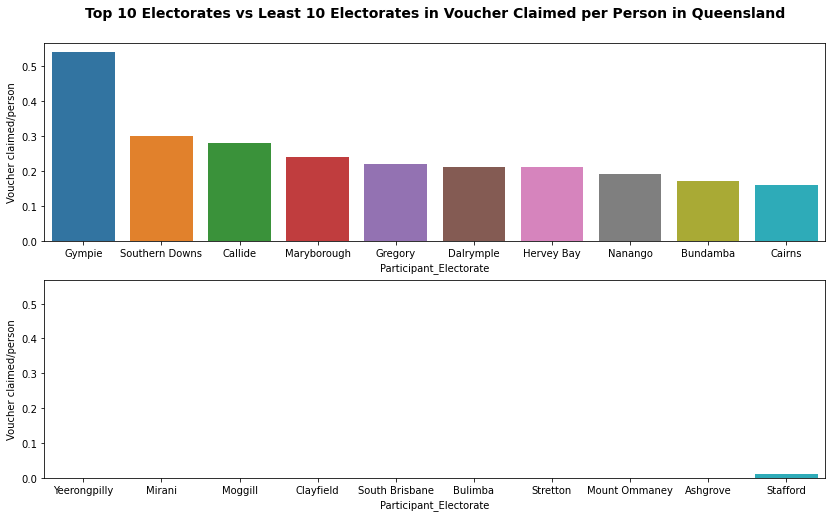

In [76]:
# create plots for comparison in voucher usage among electorates
fig, ax =plt.subplots(2,1, figsize=(14,8),sharey=True)
plt.title("Top 10 Electorates vs Least 10 Electorates in Voucher Claimed per Person in Queensland", fontsize=14, fontweight='bold',loc = 'center',y=2.3)
sns.barplot(x="Participant_Electorate", y="Voucher claimed/person", data=top10_voucher_electorates_ql,ax=ax[0])
sns.barplot(x="Participant_Electorate", y="Voucher claimed/person", data=least10_voucher_electorates_ql,ax=ax[1])

### Comparing Voucher Usage in South Australia vs Queensland

In [77]:
top_voucher_electorates_SA_QL = pd.concat([top10_voucher_electorates,top10_voucher_electorates_ql])
top_voucher_electorates_SA_QL.sort_values('Voucher claimed/person', ascending = False)

,Participant_Electorate,Voucher count,Voucher total,Population,Voucher claimed/person,State
14,FLINDERS,4155,199075.0,8437,23.60,South Australia
16,FROME,2367,113615.0,7124,15.95,South Australia
40,STUART,2893,142730.0,9244,15.44,South Australia
4,CHAFFEY,2612,129719.0,8758,14.81,South Australia
18,GOYDER,2944,144429.0,11412,12.66,South Australia
27,MACKILLOP,3074,151836.0,14654,10.36,South Australia
32,MOUNT GAMBIER,4024,200845.0,21844,9.19,South Australia
39,SCHUBERT,3569,175520.0,20726,8.47,South Australia
17,GILES,3025,146132.0,18313,7.98,South Australia
21,HEYSEN,6008,299880.0,41247,7.27,South Australia


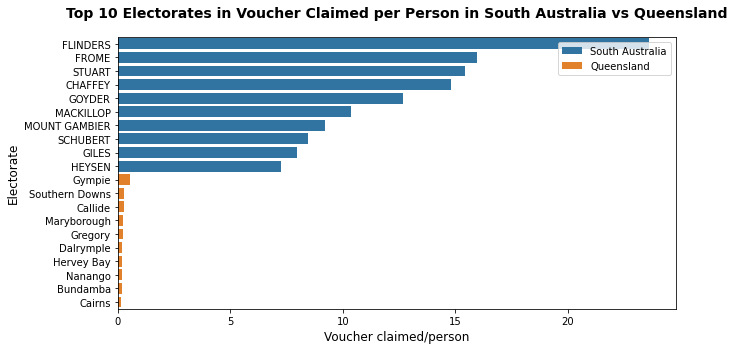

In [78]:
fig, ax =plt.subplots(figsize=(10,5))
sns.barplot(y="Participant_Electorate", x="Voucher claimed/person", hue="State",
            data=top_voucher_electorates_SA_QL, 
            dodge=False)

plt.ylabel("Electorate", size=12)
plt.xlabel("Voucher claimed/person", size=12)
plt.title("Top 10 Electorates in Voucher Claimed per Person in South Australia vs Queensland", fontsize=14, fontweight='bold', y=1.05)
plt.legend(loc="upper right")

In [79]:
least_voucher_electorates_SA_QL = pd.concat([least10_voucher_electorates,least10_voucher_electorates_ql])
least_voucher_electorates_SA_QL.sort_values('Voucher claimed/person', ascending = True)

,Participant_Electorate,Voucher count,Voucher total,Population,Voucher claimed/person,State
56,Mount Ommaney,32,4740.0,1042074,0.00,Queensland
76,Stretton,32,4676.0,1042074,0.00,Queensland
9,Bulimba,13,1826.0,1042074,0.00,Queensland
71,South Brisbane,28,4200.0,1042074,0.00,Queensland
20,Clayfield,24,3600.0,1042074,0.00,Queensland
52,Moggill,12,1800.0,1042074,0.00,Queensland
51,Mirani,3,450.0,112812,0.00,Queensland
87,Yeerongpilly,36,5118.0,1042074,0.00,Queensland
2,Ashgrove,31,4546.0,1042074,0.00,Queensland
75,Stafford,44,6460.0,1042074,0.01,Queensland


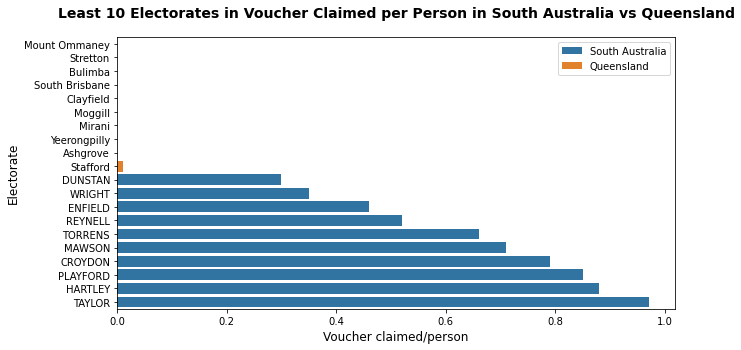

In [80]:
fig, ax =plt.subplots(figsize=(10,5))
sns.barplot(y="Participant_Electorate", x="Voucher claimed/person", hue="State",
            order=least_voucher_electorates_SA_QL.sort_values('Voucher claimed/person', ascending = True).Participant_Electorate, 
            data=least_voucher_electorates_SA_QL, 
            dodge=False)

plt.ylabel("Electorate", size=12)
plt.xlabel("Voucher claimed/person", size=12)
plt.title("Least 10 Electorates in Voucher Claimed per Person in South Australia vs Queensland", fontsize=14, fontweight='bold', y=1.05)
plt.legend(loc="upper right")



## Relationship between SEIFA Measures and Voucher Use in Queensland

In [81]:
# sum up voucher values by LGA for analysis
total_voucher_LGA_ql = qld_vouchers_scores_clean.groupby("Participant_LGA",as_index=False)['Voucher_Value'].sum()
total_voucher_LGA_ql

,Participant_LGA,Voucher_Value
0,BLACKALL TAMBO,260.00
1,BRISBANE,209036.50
2,BUNDABERG,15902.00
3,CAIRNS,39489.00
4,CASSOWARY COAST,5162.00
5,CENTRAL HIGHLANDS,2660.00
6,CHARTERS TOWERS,1736.00
7,FRASER COAST,43241.00
8,GLADSTONE,4080.00
9,GOLD COAST,250426.00


In [82]:
# combine data of total voucher values with SEIFA measures by LGA
total_voucher_seifa_ql = total_voucher_LGA_ql.join(LGA_scores, on='Participant_LGA')
total_voucher_seifa_ql

,Participant_LGA,Voucher_Value,IEO,IER,IRSAD,IRSD,Population
0,BLACKALL TAMBO,260.00,981.0,981.0,945.0,961.0,2209.0
1,BRISBANE,209036.50,1018.0,1018.0,1057.0,1048.0,1042074.0
2,BUNDABERG,15902.00,954.0,954.0,917.0,930.0,89786.0
3,CAIRNS,39489.00,967.0,967.0,975.0,981.0,156176.0
4,CASSOWARY COAST,5162.00,957.0,957.0,926.0,944.0,27676.0
5,CENTRAL HIGHLANDS,2660.00,996.5,996.5,957.5,963.5,15495.5
6,CHARTERS TOWERS,1736.00,971.0,971.0,931.0,948.0,12157.0
7,FRASER COAST,43241.00,947.0,947.0,908.0,917.0,95348.0
8,GLADSTONE,4080.00,1040.0,1040.0,1007.0,1016.0,57874.0
9,GOLD COAST,250426.00,1008.0,1008.0,1016.0,1014.0,494591.0


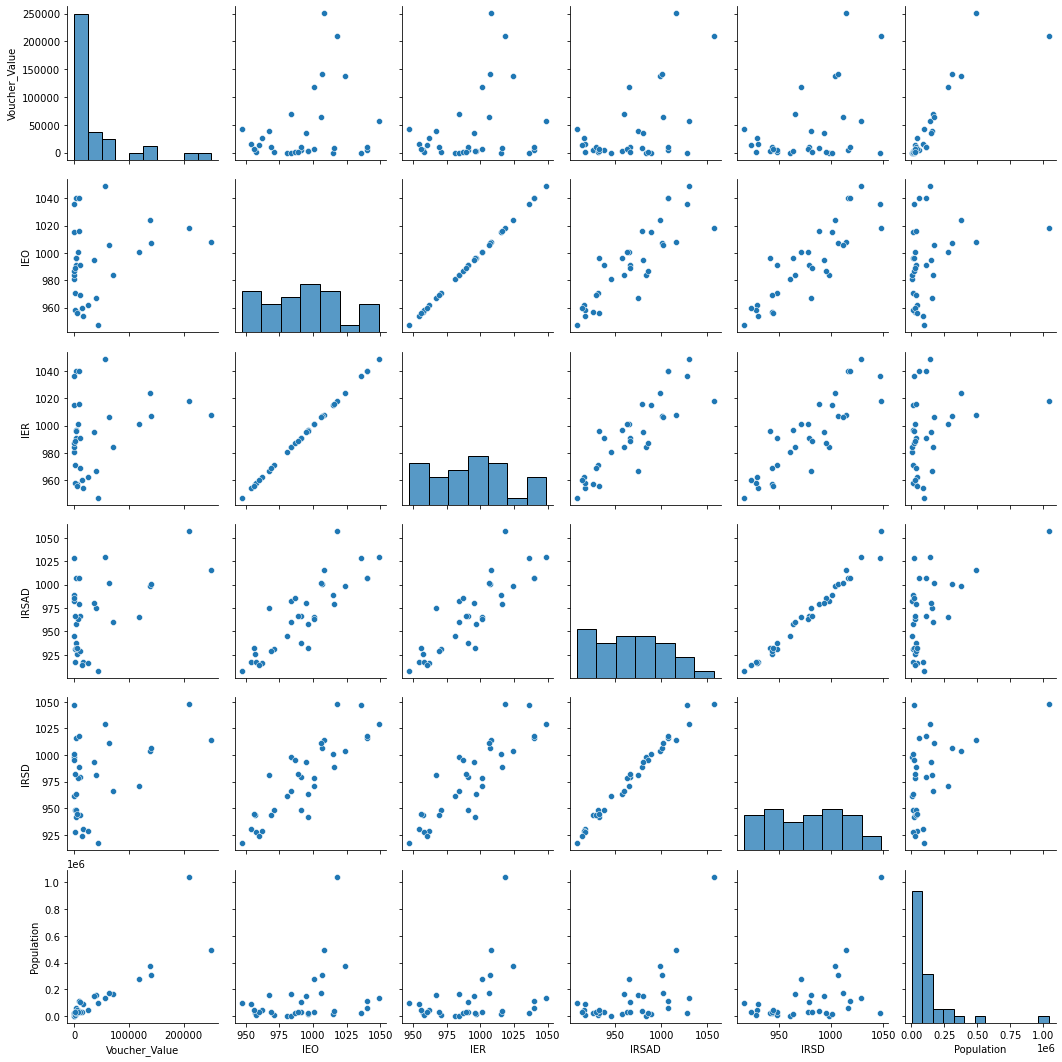

In [83]:
# plot pairwise relationships in the dataset
sns.pairplot(total_voucher_seifa_ql)

In [84]:
# check correlation between voucher values and SEIFA measures
total_voucher_seifa_ql.corr()

,Voucher_Value,IEO,IER,IRSAD,IRSD,Population
Voucher_Value,1.000000,0.275734,0.275734,0.507577,0.417656,0.884693
IEO,0.275734,1.000000,1.000000,0.858972,0.864667,0.301146
IER,0.275734,1.000000,1.000000,0.858972,0.864667,0.301146
IRSAD,0.507577,0.858972,0.858972,1.000000,0.990257,0.573150
IRSD,0.417656,0.864667,0.864667,0.990257,1.000000,0.486227
Population,0.884693,0.301146,0.301146,0.573150,0.486227,1.000000


### Linear Regression Model

In [85]:
train, test = train_test_split(total_voucher_seifa_ql, test_size=0.2, random_state=142)
print(train.shape)
print(test.shape)

(26, 7)
(7, 7)


In [86]:
X_train = train[['IEO','IER','IRSAD','IRSD']]
y_train = train['Voucher_Value']

X_test = test[['IEO','IER','IRSAD','IRSD']]
y_test = test['Voucher_Value']

print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (26, 4)
y_train shape:  (26,)
X_test shape:  (7, 4)
y_test shape:  (7,)


In [87]:
model = LinearRegression()
model.fit(X_train, y_train)
pd.DataFrame(model.coef_, X_test.columns, columns = ['Coefficient'])

,Coefficient
IEO,-273.186177
IER,-273.186177
IRSAD,6021.451992
IRSD,-5507.939947


[  7269.12750332  17099.93149177 116106.30293282  23858.66796175
   -920.2080795  170252.15287194  -4743.91775598]


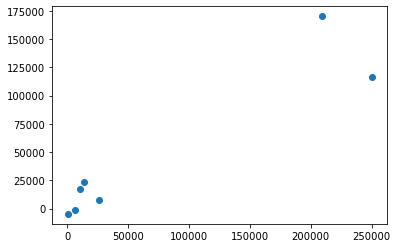

In [88]:
y_pred = model.predict(X_test) 
print(y_pred)
plt.scatter(y_test, y_pred)

In [89]:
print("MSE: ", mean_squared_error(y_test, y_pred))
print("R-square: ", r2_score(y_test, y_pred))

MSE:  2876283647.7322397
R-square:  0.7100389041037838


* R-square is 0.71 indicating a strong positive relationship between SEIFA measures and voucher claims in Queensland.